In [2]:
import sep
from astropy.io import fits
from astropy.modeling import rotations
import numpy as np
import matplotlib.pyplot as plt
from astropy.utils.data import download_file
from astropy import units as u
%matplotlib inline

In [3]:
f105w = download_file('https://archive.stsci.edu/pub/hlsp/hudf12/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits')
hdul = fits.open(f105w)
data = hdul[0].data
hdul.info()
hdul.close()

Filename: /var/folders/zz/zyxvpxvq6csfxvn_n000x_6m007_jn/T/tmpg41gm99d
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     359   (3600, 3600)   float32   


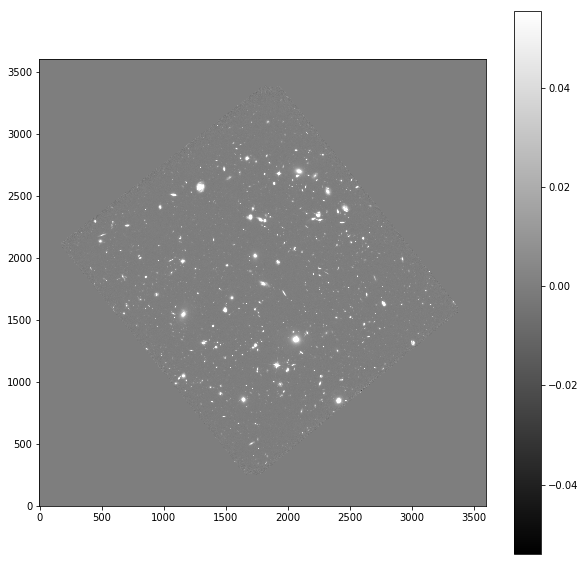

In [4]:
m, s = np.mean(data), np.std(data)
plt.figure(figsize=(10,10))
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

In [5]:
data = data.byteswap(inplace=True).newbyteorder()
bkg = sep.Background(data, bw=16, bh=16)

In [6]:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005099902045913041


In [7]:
bkg_f105w = bkg.back()

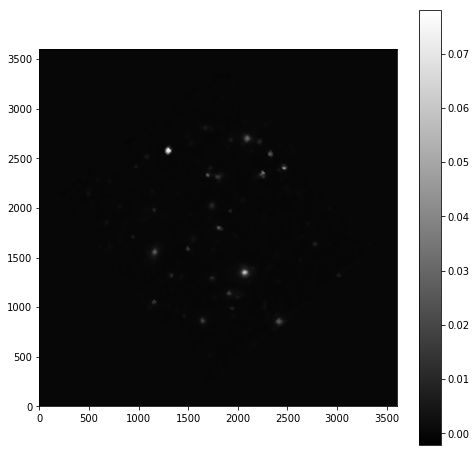

In [8]:
plt.figure(figsize=(8,8))
plt.imshow(bkg_f105w, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [9]:
bkg_rms = bkg.rms()

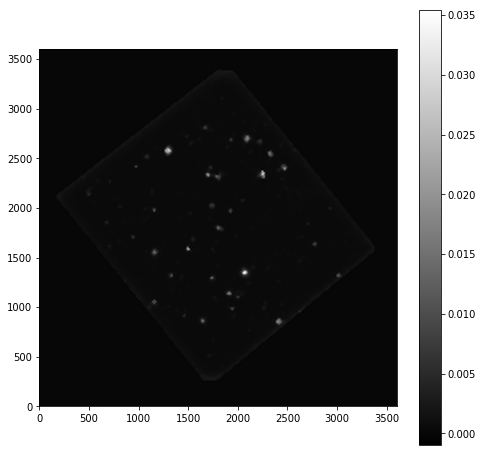

In [10]:
plt.figure(figsize=(8,8))
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [11]:
data_sub = data - bkg

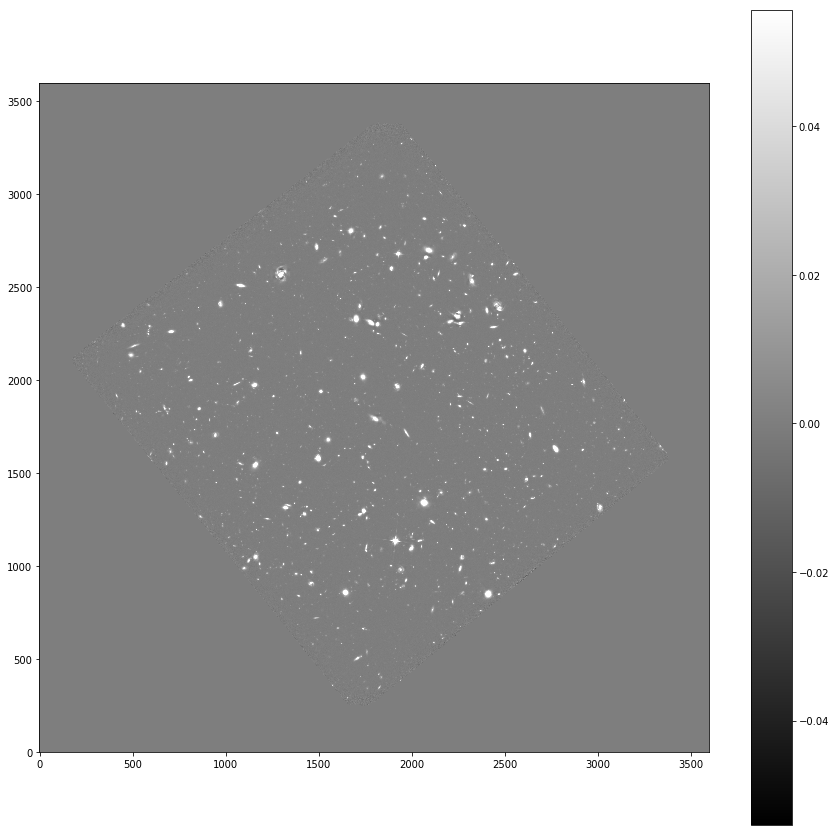

In [12]:
plt.figure(figsize=(15,15))
plt.imshow(data_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()

In [13]:
msk = data<=0.02
objects = sep.extract(data_sub, 3, err=bkg.globalrms, mask=msk)

In [14]:
len(objects)

810

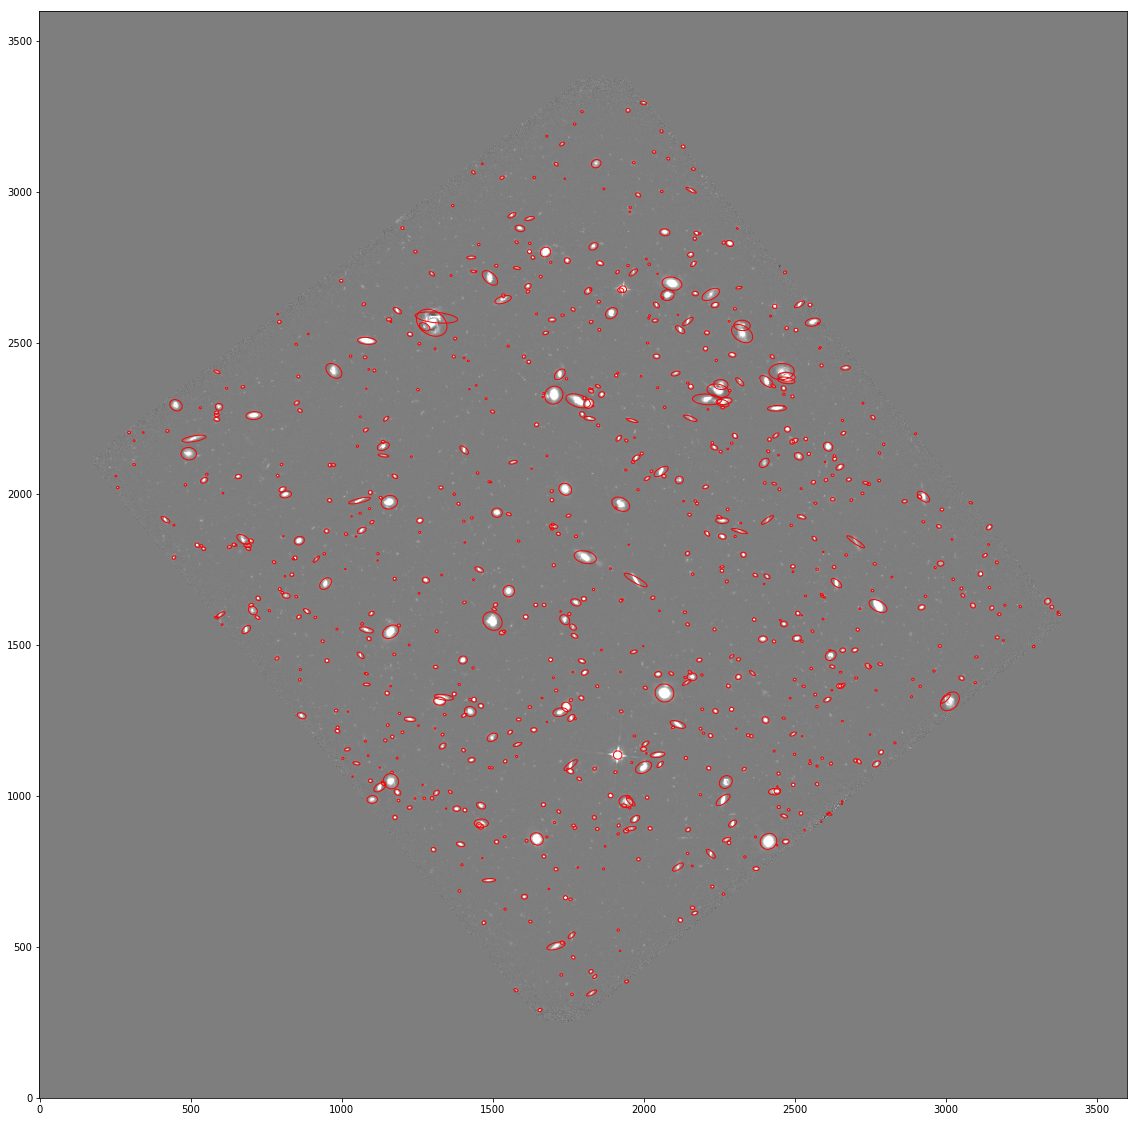

In [15]:
from matplotlib.patches import Ellipse

fig, ax = plt.subplots(figsize=(20,20))
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),width=8*objects['a'][i],height=8*objects['b'][i],angle=objects['theta'][i]*180/(2*np.pi))
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

In [16]:
flux, fluxerr, flag = sep.sum_circle(data_sub,objects['x'],objects['y'],3.0,err=bkg.globalrms,mask=msk, gain=1.0)

In [17]:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i,flux[i],fluxerr[i]))

object 0: flux = 1.247050 +/- 1.116717
object 1: flux = 0.686795 +/- 0.828735
object 2: flux = 1.114998 +/- 1.055938
object 3: flux = 1.217056 +/- 1.103206
object 4: flux = 0.899049 +/- 0.948186
object 5: flux = 0.823192 +/- 0.907303
object 6: flux = 0.761383 +/- 0.872577
object 7: flux = 1.263850 +/- 1.124214
object 8: flux = 1.067958 +/- 1.033424
object 9: flux = 0.571732 +/- 0.756134


In [18]:
for i in range(810):
    Mags = {}
    Mags[i] = u.Magnitude(flux[i])
    print(Mags)

{0: <Magnitude 1.24705008 mag>}
{1: <Magnitude 0.68679456 mag>}
{2: <Magnitude 1.11499831 mag>}
{3: <Magnitude 1.21705583 mag>}
{4: <Magnitude 0.89904862 mag>}
{5: <Magnitude 0.82319183 mag>}
{6: <Magnitude 0.76138266 mag>}
{7: <Magnitude 1.26384954 mag>}
{8: <Magnitude 1.0679583 mag>}
{9: <Magnitude 0.57173152 mag>}
{10: <Magnitude 3.18421469 mag>}
{11: <Magnitude 0.83105919 mag>}
{12: <Magnitude 1.0527996 mag>}
{13: <Magnitude 0.67878291 mag>}
{14: <Magnitude 1.43656543 mag>}
{15: <Magnitude 0.85556561 mag>}
{16: <Magnitude 2.2282096 mag>}
{17: <Magnitude 1.21308372 mag>}
{18: <Magnitude 0.6362079 mag>}
{19: <Magnitude 0.80476338 mag>}
{20: <Magnitude 0.640895 mag>}
{21: <Magnitude 8.20261571 mag>}
{22: <Magnitude 1.29652715 mag>}
{23: <Magnitude 0.66673601 mag>}
{24: <Magnitude 0.7499287 mag>}
{25: <Magnitude 0.59049103 mag>}
{26: <Magnitude 0.94978142 mag>}
{27: <Magnitude 1.41938108 mag>}
{28: <Magnitude 0.67708784 mag>}
{29: <Magnitude 1.08661626 mag>}
{30: <Magnitude 0.58598227 

{292: <Magnitude 0.75956599 mag>}
{293: <Magnitude 0.64291392 mag>}
{294: <Magnitude 0.82655219 mag>}
{295: <Magnitude 1.15782395 mag>}
{296: <Magnitude 0.73144967 mag>}
{297: <Magnitude 0.60790346 mag>}
{298: <Magnitude 1.26573787 mag>}
{299: <Magnitude 4.93216904 mag>}
{300: <Magnitude 0.94047517 mag>}
{301: <Magnitude 5.64099089 mag>}
{302: <Magnitude 1.56315929 mag>}
{303: <Magnitude 0.77051488 mag>}
{304: <Magnitude 1.03228735 mag>}
{305: <Magnitude 0.69963013 mag>}
{306: <Magnitude 0.65232634 mag>}
{307: <Magnitude 0.62603486 mag>}
{308: <Magnitude 1.03961014 mag>}
{309: <Magnitude 0.92935349 mag>}
{310: <Magnitude 2.9816126 mag>}
{311: <Magnitude 2.90272016 mag>}
{312: <Magnitude 0.42626171 mag>}
{313: <Magnitude 1.02534152 mag>}
{314: <Magnitude 0.63436275 mag>}
{315: <Magnitude 0.73391311 mag>}
{316: <Magnitude 0.90306846 mag>}
{317: <Magnitude 1.92633894 mag>}
{318: <Magnitude 56.08747962 mag>}
{319: <Magnitude 0.63363112 mag>}
{320: <Magnitude 0.59452572 mag>}
{321: <Magnitu

{719: <Magnitude 0.969481 mag>}
{720: <Magnitude 0.75061134 mag>}
{721: <Magnitude 3.73007489 mag>}
{722: <Magnitude 30.06051198 mag>}
{723: <Magnitude 2.01303943 mag>}
{724: <Magnitude 0.8602508 mag>}
{725: <Magnitude 3.51361999 mag>}
{726: <Magnitude 1.96282775 mag>}
{727: <Magnitude 3.09170354 mag>}
{728: <Magnitude 0.7475133 mag>}
{729: <Magnitude 0.53983053 mag>}
{730: <Magnitude 1.28350507 mag>}
{731: <Magnitude 0.82945114 mag>}
{732: <Magnitude 1.68770002 mag>}
{733: <Magnitude 6.2444159 mag>}
{734: <Magnitude 0.73671594 mag>}
{735: <Magnitude 1.97738357 mag>}
{736: <Magnitude 0.60584047 mag>}
{737: <Magnitude 1.40320704 mag>}
{738: <Magnitude 0.71483998 mag>}
{739: <Magnitude 1.80273512 mag>}
{740: <Magnitude 26.37166331 mag>}
{741: <Magnitude 214.06586359 mag>}
{742: <Magnitude 1.02680568 mag>}
{743: <Magnitude 42.83180587 mag>}
{744: <Magnitude 0.72986204 mag>}
{745: <Magnitude 0.62029713 mag>}
{746: <Magnitude 0.5133984 mag>}
{747: <Magnitude 1.16484458 mag>}
{748: <Magnitud

In [19]:
hdul[0].header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 3600 / Axis length                                    
NAXIS2  =                 3600 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
IRAF-TLM= '2012-12-04T19:12:18' / Time of last modification                     
FILENAME= 'hlsp_candels_hst_hst_hudf12_wfc3ir_f105w_60mas' / MAST HLSP FileName 
OBJECT  = 'HLSP_HUDF12_HST_WFC3IR_UDFMAIN_F105W_60MAS_V1.0_DRZ[1/1]'            
ORIGIN  = 'KPNO-IRAF'           /                                               
DATE    = '2012-12-04T19:09:11'                                                 
IRAF-MAX=           7.444648E1  /  DATA MAX                                     
IRAF-MIN=         -9.047293E

In [20]:
# Slice the data into 1296 sections of 100 x 100 arrays and place them into a dictionary
ndata = {}
for i in range(36):
    for n in range(36):
        ndata[36*i + n] = data[100*i:100*i+100:1,100*n:100*n+100:1]

In [21]:
# Convert the dictionary to a list
adata = np.array(list(ndata.values()))

In [22]:
ndata_sub = {}
grms = {}
gback = {}
for i in range(1296):
    # Subtract the background from each element in the adata list and place it in a dictionary
    ndata_sub[i] = adata[i] - sep.Background(adata[i], bw=32, bh=32)
    
    # Create a dict of all of the global rms values
    grms[i] = sep.Background(adata[i], bw=32, bh=32).globalrms
    
    # Create a dict of all of the global background values
    gback[i] = sep.Background(adata[i], bw=32, bh=32).globalback

# Convert the dict to a list
adata_sub = np.array(list(ndata_sub.values()))

In [23]:
agback = np.array(list(gback.values()))

In [24]:
# Convert the grms dict into a list, then take the average of all of the relevant grms values
agrms = np.array(list(grms.values()))
u = 0
for i in range(1296):
    if(agrms[i]==1):
        u += 1
    else:
        continue
Avg_agrms = (sum(agrms)-u)/(1296-u)

In [25]:
# Place the raw sep.extract data into the sxt dict and the len(sep.extract) data into an objects dict
objects = {}
sxt = {}
for i in range(1296):
    v = np.exp(agrms[i]/Avg_agrms)
    print(i,'\t',v)
    q = sep.extract(adata_sub[i], v, err=sep.Background(adata[i], bw=32, bh=32).globalrms)
    sxt[i] = sep.extract(adata_sub[i], v, err=sep.Background(adata[i], bw=32, bh=32).globalrms)
    if(len(q)>30):
        q = sep.extract(adata_sub[i], 30*v, err=sep.Background(adata[i], bw=32, bh=32).globalrms)
    objects[i] = len(q)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


0 	 inf
1 	 inf
2 	 inf
3 	 inf
4 	 inf
5 	 inf
6 	 inf
7 	 inf
8 	 inf
9 	 inf
10 	 inf
11 	 inf
12 	 inf
13 	 inf
14 	 inf
15 	 inf
16 	 inf
17 	 inf
18 	 inf
19 	 inf
20 	 inf
21 	 inf
22 	 inf
23 	 inf
24 	 inf
25 	 inf
26 	 inf
27 	 inf
28 	 inf
29 	 inf
30 	 inf
31 	 inf
32 	 inf
33 	 inf
34 	 inf
35 	 inf
36 	 inf
37 	 inf
38 	 inf
39 	 inf
40 	 inf
41 	 inf
42 	 inf
43 	 inf
44 	 inf
45 	 inf
46 	 inf
47 	 inf
48 	 inf
49 	 inf
50 	 inf
51 	 inf
52 	 inf
53 	 inf
54 	 inf
55 	 inf
56 	 inf
57 	 inf
58 	 inf
59 	 inf
60 	 inf
61 	 inf
62 	 inf
63 	 inf
64 	 inf
65 	 inf
66 	 inf
67 	 inf
68 	 inf
69 	 inf
70 	 inf
71 	 inf
72 	 inf
73 	 inf
74 	 inf
75 	 inf
76 	 inf
77 	 inf
78 	 inf
79 	 inf
80 	 inf
81 	 inf
82 	 inf
83 	 inf
84 	 inf
85 	 inf
86 	 inf
87 	 inf
88 	 14.753468545284266
89 	 3.4250330770680404
90 	 10.47563468338378
91 	 inf
92 	 inf
93 	 inf
94 	 inf
95 	 inf
96 	 inf
97 	 inf
98 	 inf
99 	 inf
100 	 inf
101 	 inf
102 	 inf
103 	 inf
104 	 inf
105 	 inf
106 	 

664 	 2.1760721746474756
665 	 2.594058998850695
666 	 2.1925176667023405
667 	 2.0837986533237736
668 	 2.114499470278551
669 	 2.054791237332027
670 	 2.4047028361985183
671 	 2.159428229644311
672 	 2.0935797381012553
673 	 2.122837935413339
674 	 2.1973004125970266
675 	 2.0863799576693896
676 	 2.2257986500486915
677 	 2.2512576672488143
678 	 2.7274427463622115
679 	 3.6533215769161975
680 	 1.000794019016644
681 	 inf
682 	 inf
683 	 inf
684 	 inf
685 	 inf
686 	 3.2566568291556273
687 	 3.2534060598619092
688 	 2.0651802262613583
689 	 2.104282660940489
690 	 2.1320240684574285
691 	 2.2706910583157787
692 	 2.0144165333722768
693 	 2.0884053341138324
694 	 2.4115506870088805
695 	 2.575920462721423
696 	 2.2153093528869308
697 	 2.1919277710009584
698 	 2.3547081744086014
699 	 2.0590396233254853
700 	 2.148745100393826
701 	 2.4197786301340316
702 	 2.174584753014937
703 	 2.142346591176657
704 	 2.1144584219119604
705 	 2.1671780739348656
706 	 2.219438167384374
707 	 2.2859

1098 	 2.198266906041549
1099 	 2.1977157571476296
1100 	 2.4003169585051687
1101 	 3.4818013900448586
1102 	 7.579038913965064
1103 	 inf
1104 	 inf
1105 	 inf
1106 	 inf
1107 	 inf
1108 	 inf
1109 	 inf
1110 	 inf
1111 	 inf
1112 	 inf
1113 	 inf
1114 	 inf
1115 	 inf
1116 	 inf
1117 	 inf
1118 	 inf
1119 	 inf
1120 	 inf
1121 	 inf
1122 	 inf
1123 	 inf
1124 	 inf
1125 	 inf
1126 	 inf
1127 	 inf
1128 	 inf
1129 	 inf
1130 	 7.640770998770721
1131 	 4.413698688646282
1132 	 2.851114886781344
1133 	 2.4702018061744813
1134 	 2.2684212103271992
1135 	 2.300996941861973
1136 	 4.012870690802506
1137 	 5.322326259379905
1138 	 inf
1139 	 inf
1140 	 inf
1141 	 inf
1142 	 inf
1143 	 inf
1144 	 inf
1145 	 inf
1146 	 inf
1147 	 inf
1148 	 inf
1149 	 inf
1150 	 inf
1151 	 inf
1152 	 inf
1153 	 inf
1154 	 inf
1155 	 inf
1156 	 inf
1157 	 inf
1158 	 inf
1159 	 inf
1160 	 inf
1161 	 inf
1162 	 inf
1163 	 inf
1164 	 inf
1165 	 inf
1166 	 inf
1167 	 4.192135921009767
1168 	 3.9998408091264577
116

In [26]:
# Convert objects dict into list
aobjects = np.array(list(objects.values()))

In [27]:
# Problematic slices
for i in range(1296):
    if(aobjects[i]>=25):
        print(i,'\t',aobjects[i])

350 	 26
475 	 33
536 	 40
651 	 37
820 	 46
944 	 61
1205 	 78
1207 	 91


In [71]:
dflux = {}
dfluxerr = {}
dflag = {}

for n in range(1296):
    dflux[n], dfluxerr[n], dflag[n] = sep.sum_circle(adata_sub[n],sxt[n]['x'],sxt[n]['y'],np.exp(agrms[n]/Avg_agrms)\
                                                     ,err=agrms[n], gain=1.0)

aflux = np.array(list(dflux.values()))
afluxerr = np.array(list(dfluxerr.values()))
aflag = np.array(list(dflag.values()))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


2526


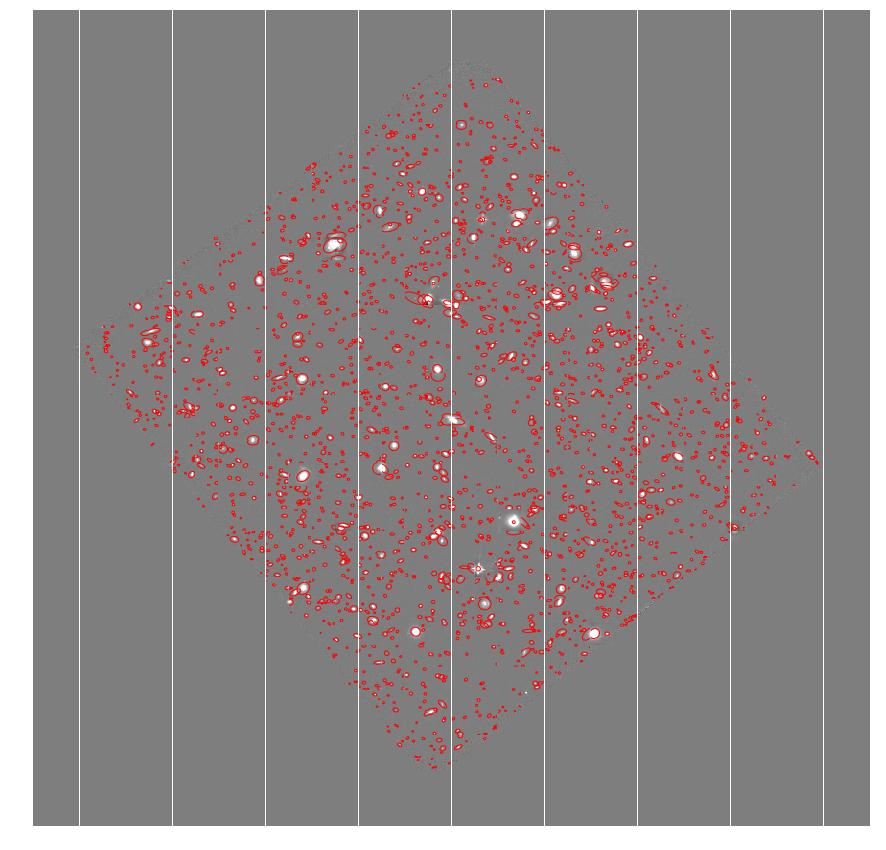

In [77]:
# Plot all of the background subtracted slices with ellipses around the objects
from matplotlib.patches import Ellipse

im = {}
fig, ax = plt.subplots(ncols=36, nrows=36, figsize=(15,15))
fig.subplots_adjust(hspace=0, wspace=0)
w = 0
z = 0
no = 0
m, s = np.mean(data_sub), np.std(data_sub)
for n in range(1296):
    im[n] = ax[35-z,w].imshow(adata_sub[n], interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
    ax[35-z,w].axis('off')
    
    if(aobjects[n]>=25):
        if(w==35):
            w = 0
            z += 1
        else:
            w += 1
    else:
        for i in range(aobjects[n]):
            try:
                if(aflux[n][i]<=0.05):
                    continue
                else:
                    try:
                        e = Ellipse(xy=(sxt[n]['x'][i], sxt[n]['y'][i]),width=6*sxt[n]['a'][i],height=6*sxt[n]['b'][i],\
                                    angle=sxt[n]['theta'][i]*180/(2*np.pi))
                    except:
                        continue
                    e.set_facecolor('none')
                    e.set_edgecolor('red')
                    ax[35-z,w].add_artist(e)
                    no += 1
            except:
                try:
                    e = Ellipse(xy=(sxt[n]['x'][i], sxt[n]['y'][i]),width=6*sxt[n]['a'][i],height=6*sxt[n]['b'][i],\
                                angle=sxt[n]['theta'][i]*180/(2*np.pi))
                except:
                    continue
                e.set_facecolor('none')
                e.set_edgecolor('red')
                ax[35-z,w].add_artist(e)
                no += 1
        if(w==35):
            w = 0
            z += 1
        else:
            w += 1
print(no)

### There are 2526 objects in this image, with uncertainty due to high noise around the border, the same objects being detected multiple times on slice boundaries, and the inability to differentiate low noise from especially faint objects in certain regions.

## Aperature Photometry

In [78]:
fluxes = np.concatenate(aflux)
fluxerrs = np.concatenate(afluxerr)
flags = np.concatenate(aflag)

In [79]:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i,fluxes[i],fluxerrs[i]))

object 0: flux = 2.337779 +/- 1.529574
object 1: flux = 0.019353 +/- 0.139200
object 2: flux = 0.088522 +/- 0.297566
object 3: flux = 0.047690 +/- 0.218434
object 4: flux = 0.119134 +/- 0.345191
object 5: flux = 0.062824 +/- 0.250694
object 6: flux = 0.045736 +/- 0.213914
object 7: flux = 0.028935 +/- 0.170172
object 8: flux = 0.073416 +/- 0.270997
object 9: flux = 0.006161 +/- 0.078639


In [80]:
print('Fluxes: ',len(fluxes))
print('Objects:',np.sum(aobjects))

Fluxes:  5093
Objects: 5072


(array([28., 21., 46., ...,  0.,  0.,  0.]),
 array([0.00000000e+00, 9.81739643e-04, 1.96347929e-03, ...,
        4.99803652e+00, 4.99901826e+00, 5.00000000e+00]),
 <a list of 5093 Patch objects>)

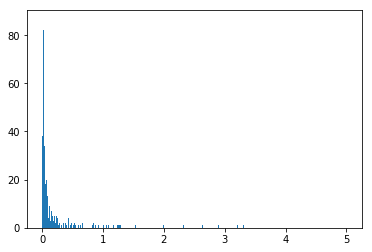

In [81]:
from astropy import visualization as vis

# supposed to have ~1950 bins, but the outlier at the array's start makes it impossible
vis.hist(fluxes,5093,range=(0,5))